<a href="https://colab.research.google.com/github/s1ms2l8/Mineracao-de-Dados/blob/main/Primeira_Analise_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prática 1 - Dados de uma rede de Supermercados 


#<font color='red'>Crie um texto sobre o contexto dessa base de dados, detalhando cada coluna:</font>
### Contexto: Dados de vendas de três filiais com cerca de 1000 linhas, a coluna total significa o rendimento bruto....

>Contexto: uma base de dados de mil linhas, com dados de três filiais de super-mercados ao longo de três meses.

>Filial: representa qual a filial referente a transação, com os valores A, B e C

>Tipo de Cliente: valor que representa se  cliente é ou não associado

>Gênero: representa se o cliente é menina(F) ou menino(M)

>Linha de Produto: representa a qual grupo o produto comprado pertence

>Preço Unitário: Valor de uma única unidade do produto

>Quantidade: Representa a quantidade comprada do produto

>Total: é o valor bruto total do produto

>Data: representa o mês em que a compra foi feita

>Hotário: representa o período do dia em que a compra foi feita

>Pagamento: representa a forma de pagamento utilizada

>COGS: representa o valor pago com imposto

>Avaliação: representa a nota de 0 a 100 avaliada pelo cliente referente a filial


In [1]:
import gdown #gdown é a biblioteca para baixar arquivos do drive

### Os dados se encontram nesse link:

Dados: https://docs.google.com/spreadsheets/d/1exmP2er4MvJ4yyaop3_yGhCYYmGb7s6A/edit?usp=share_link&ouid=110731142320700311054&rtpof=true&sd=true

#<font color='red'>Por que se utiliza "!" antes do comando gdown, para baixar a base?</font>

> a exclamação é utilizada para informar que o comando executado deve ser interpretado como comando da VM e não código python 

In [2]:
!gdown 1exmP2er4MvJ4yyaop3_yGhCYYmGb7s6A #Apenas o Hash do arquivo 

Downloading...
From: https://drive.google.com/uc?id=1exmP2er4MvJ4yyaop3_yGhCYYmGb7s6A
To: /content/SuperMercados.xlsx
100% 97.5k/97.5k [00:00<00:00, 39.3MB/s]


### Foi utilizado a biblioteca gdown para transferir do drive para a IDE Colab


#<font color='red'>Por que precisamos de bibliotecas no python?</font>
#<font color='red'>Coloque o link da documentação dessas bibliotecas para que serve (detalhadamente)</font>



> Numpy, biblioteca matemática, focada na manipulação de dados numéricos.
https://numpy.org/doc/stable/reference/index.html#reference

>Pandas, é uma biblioteca de focada na manipulação de dados, utilizando conceitos da ciência de dados para tratar uma grande quantidade de informação.https://pandas.pydata.org/docs/

>Pyplot a biblioteca Pyplot é parte da biblioteca Matplotlib, e é usada para criar visualizações gráficas de dados. https://matplotlib.org/stable/tutorials/introductory/pyplot.html

>seaborn é uma biblioteca que fornece uma interface de alto nível para criar gráficos estatísticos complexos de forma fácil e rápida, com menos código do que usando Matplotlib diretamente.https://seaborn.pydata.org/tutorial.html

In [3]:
import numpy as np  #Biblioteca responsável por operações matemáticas 
import pandas as pd # Biblioteca responsável pela manipulação de dados
import matplotlib.pyplot as plt # Biblioteca responsável pela visualização de dados
import seaborn as sns # Biblioteca de visualização de dados em alto nível 


In [4]:
df = pd.read_excel('SuperMercados.xlsx') #Leitura dos dados para um dataframe (df)

In [5]:
df.head() #Mostra apenas as cinco primeiras linhas do dataframe

,Unnamed: 0,ID da fatura,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Tempo,Pagamento,COGS,porcentagem de margem bruta,renda bruta,Avaliação
0,0,750-67-8428,A,Member,F,Saúde e beleza,1120.35,7,7842.45,1/5/2019,13:08:00,PIX,4705.4700,4761904762,261415,91
1,1,226-31-3081,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,3/8/2019,10:29:00,Dinheiro,1031.4000,4761904762,382,96
2,2,631-41-3108,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,3/3/2019,13:23:00,Cartão de Crédito,3405.2550,4761904762,162155,74
3,3,123-19-1176,A,Member,M,Saúde e beleza,873.30,8,6986.40,1/27/2019,20:33:00,PIX,4191.8400,4761904762,23288,84
4,4,373-73-7910,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,2/8/2019,10:37:00,PIX,6796.9125,4761904762,302085,53


# Etapa: Limpeza e transformação da base de dados

#<font color='red'>Explique o comando abaixo, de qual biblioteca se trata?</font>

>Seaborn, um comando de mapa de calor mostrando os dados caracterisados como not a number(nulo) na base de dados

<Axes: >

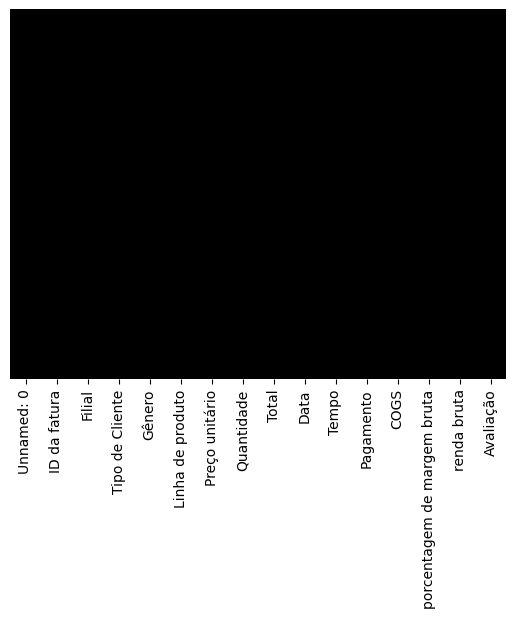

In [6]:
sns.heatmap(df.isnull(),
            yticklabels = False,
            cbar = False,
            cmap = 'gnuplot') #Função do seaborn para visualizar dados que estejam faltando (NaN = Not a Number)

In [7]:
df #Para verificar os dados

,Unnamed: 0,ID da fatura,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Tempo,Pagamento,COGS,porcentagem de margem bruta,renda bruta,Avaliação
0,0,750-67-8428,A,Member,F,Saúde e beleza,1120.35,7,7842.45,1/5/2019,13:08:00,PIX,4705.4700,4761904762,261415,91
1,1,226-31-3081,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,3/8/2019,10:29:00,Dinheiro,1031.4000,4761904762,382,96
2,2,631-41-3108,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,3/3/2019,13:23:00,Cartão de Crédito,3405.2550,4761904762,162155,74
3,3,123-19-1176,A,Member,M,Saúde e beleza,873.30,8,6986.40,1/27/2019,20:33:00,PIX,4191.8400,4761904762,23288,84
4,4,373-73-7910,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,2/8/2019,10:37:00,PIX,6796.9125,4761904762,302085,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,233-67-5758,C,Normal,M,Saúde e beleza,605.25,1,605.25,1/29/2019,13:46:00,PIX,363.1500,4761904762,20175,62
996,996,303-96-2227,B,Normal,F,Casa e estilo de vida,1460.70,10,14607.00,3/2/2019,17:16:00,PIX,10224.9000,4761904762,4869,44
997,997,727-02-1313,A,Member,M,Comida e bebidas,477.60,1,477.60,2/9/2019,13:22:00,Dinheiro,405.9600,4761904762,1592,77
998,998,347-56-2442,A,Normal,M,Casa e estilo de vida,987.30,1,987.30,2/22/2019,15:33:00,Dinheiro,691.1100,4761904762,3291,41


#<font color='red'>O que significa inplace?</font>

>que o dataset utilizado será modificado diretamente, caso estivesse falso, seria criado um nodo dataset sem a coluna dropada

In [8]:
df.drop(columns=['Unnamed: 0'], inplace = True) #Deletando a coluna "Unnamed: 0"

In [9]:
df

,ID da fatura,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Tempo,Pagamento,COGS,porcentagem de margem bruta,renda bruta,Avaliação
0,750-67-8428,A,Member,F,Saúde e beleza,1120.35,7,7842.45,1/5/2019,13:08:00,PIX,4705.4700,4761904762,261415,91
1,226-31-3081,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,3/8/2019,10:29:00,Dinheiro,1031.4000,4761904762,382,96
2,631-41-3108,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,3/3/2019,13:23:00,Cartão de Crédito,3405.2550,4761904762,162155,74
3,123-19-1176,A,Member,M,Saúde e beleza,873.30,8,6986.40,1/27/2019,20:33:00,PIX,4191.8400,4761904762,23288,84
4,373-73-7910,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,2/8/2019,10:37:00,PIX,6796.9125,4761904762,302085,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Normal,M,Saúde e beleza,605.25,1,605.25,1/29/2019,13:46:00,PIX,363.1500,4761904762,20175,62
996,303-96-2227,B,Normal,F,Casa e estilo de vida,1460.70,10,14607.00,3/2/2019,17:16:00,PIX,10224.9000,4761904762,4869,44
997,727-02-1313,A,Member,M,Comida e bebidas,477.60,1,477.60,2/9/2019,13:22:00,Dinheiro,405.9600,4761904762,1592,77
998,347-56-2442,A,Normal,M,Casa e estilo de vida,987.30,1,987.30,2/22/2019,15:33:00,Dinheiro,691.1100,4761904762,3291,41


In [10]:
df.drop(columns=['porcentagem de margem bruta', 'renda bruta', 'ID da fatura'], inplace = True) #Deletando as colunas que não vão ser usadas

In [11]:
df.head()

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Tempo,Pagamento,COGS,Avaliação
0,A,Member,F,Saúde e beleza,1120.35,7,7842.45,1/5/2019,13:08:00,PIX,4705.4700,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,3/8/2019,10:29:00,Dinheiro,1031.4000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,3/3/2019,13:23:00,Cartão de Crédito,3405.2550,74
3,A,Member,M,Saúde e beleza,873.30,8,6986.40,1/27/2019,20:33:00,PIX,4191.8400,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,2/8/2019,10:37:00,PIX,6796.9125,53


In [12]:
df.replace({'Tipo de Cliente' : {'Member' : 'Associado'}}, inplace = True) #Trocando o nome Member por Associado, na coluna Tipo de Cliente

In [13]:
df.head()

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Tempo,Pagamento,COGS,Avaliação
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,1/5/2019,13:08:00,PIX,4705.4700,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,3/8/2019,10:29:00,Dinheiro,1031.4000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,3/3/2019,13:23:00,Cartão de Crédito,3405.2550,74
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,1/27/2019,20:33:00,PIX,4191.8400,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,2/8/2019,10:37:00,PIX,6796.9125,53


In [14]:
df.rename(columns={'Tempo':'Horário'}, inplace = True) #Trocando o nome da coluna Tempo por Horário

In [15]:
df.head()

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Horário,Pagamento,COGS,Avaliação
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,1/5/2019,13:08:00,PIX,4705.4700,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,3/8/2019,10:29:00,Dinheiro,1031.4000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,3/3/2019,13:23:00,Cartão de Crédito,3405.2550,74
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,1/27/2019,20:33:00,PIX,4191.8400,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,2/8/2019,10:37:00,PIX,6796.9125,53


#<font color='red'>O que significa a função unique()?</font>

>lista cada dado uma única vez, independente de quantas vezes ele se repete

In [16]:
df['Data'].unique() #Verificando na coluna Data quais meses existem nesse caso apenas 1,2,3.

array(['1/5/2019', '3/8/2019', '3/3/2019', '1/27/2019', '2/8/2019',
       '3/25/2019', '2/25/2019', '2/24/2019', '1/10/2019', '2/20/2019',
       '2/6/2019', '3/9/2019', '2/12/2019', '2/7/2019', '3/29/2019',
       '1/15/2019', '3/11/2019', '1/1/2019', '1/21/2019', '3/5/2019',
       '3/15/2019', '2/17/2019', '3/2/2019', '3/22/2019', '3/10/2019',
       '1/25/2019', '1/28/2019', '1/7/2019', '3/23/2019', '1/17/2019',
       '2/2/2019', '3/4/2019', '3/16/2019', '2/27/2019', '2/10/2019',
       '3/19/2019', '2/3/2019', '3/7/2019', '2/28/2019', '3/27/2019',
       '1/20/2019', '3/12/2019', '2/15/2019', '3/6/2019', '2/14/2019',
       '3/13/2019', '1/24/2019', '1/6/2019', '2/11/2019', '1/22/2019',
       '1/13/2019', '1/9/2019', '1/12/2019', '1/26/2019', '1/23/2019',
       '2/23/2019', '1/2/2019', '2/9/2019', '3/26/2019', '3/1/2019',
       '2/1/2019', '3/28/2019', '3/24/2019', '2/5/2019', '1/19/2019',
       '1/16/2019', '1/8/2019', '2/18/2019', '1/18/2019', '2/16/2019',
       '2/22/201

In [17]:
df['Horário'] #Mostra apenas a coluna Horário

0      13:08:00
1      10:29:00
2      13:23:00
3      20:33:00
4      10:37:00
         ...   
995    13:46:00
996    17:16:00
997    13:22:00
998    15:33:00
999    13:28:00
Name: Horário, Length: 1000, dtype: object

#<font color='red'>Por que precisamos converter para datatime64? O que significa isso?</font>

> para fazer o tratamento de dados do tipo data o python exige a formatação datatime64 que é mais eficiente.

In [18]:
df['Data'] = pd.to_datetime(df['Data']) #Converte objeto para datatime64 (manipular data e hora)

In [19]:
df['Data']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Data, Length: 1000, dtype: datetime64[ns]

In [20]:
df['Horário'] = pd.to_datetime(df['Horário']) #Converte objeto para datatime64 (manipular data e hora)

In [21]:
df['Horário']

0     2023-03-29 13:08:00
1     2023-03-29 10:29:00
2     2023-03-29 13:23:00
3     2023-03-29 20:33:00
4     2023-03-29 10:37:00
              ...        
995   2023-03-29 13:46:00
996   2023-03-29 17:16:00
997   2023-03-29 13:22:00
998   2023-03-29 15:33:00
999   2023-03-29 13:28:00
Name: Horário, Length: 1000, dtype: datetime64[ns]

#IMPORTANTE: Esse comando foi atrasado, deveria ter sido executado no começo para verificar se algum dado está repetido.

#<font color='red'>Por que esse comando é importante quando se trata de KDD?</font>

>ele valida a quantidade de linhas duplicadas na base, que causariam divergência na analise de dados

In [22]:
df.duplicated().sum() 

0

In [23]:
df.dtypes # comando para analisar os tipos de dados no seu dataframe

Filial                      object
Tipo de Cliente             object
Gênero                      object
Linha de produto            object
Preço unitário             float64
Quantidade                   int64
Total                      float64
Data                datetime64[ns]
Horário             datetime64[ns]
Pagamento                   object
COGS                       float64
Avaliação                    int64
dtype: object

#<font color='red'>O que é dicionário em python, para que serve?</font>

>semelhante a um array é uma sequancida de valores atribuidos a um valor(key).




In [24]:
meses = {1: 'Janeiro', 2:'Fevereiro', 3: 'Março'} # Criando um dicionário 

#<font color='red'>Explique a função dt.month.map(meses)?</font>

>é uma função usada para extrair apenas o mês de uma data e criar uma nova coluna no DataFrame que contém apenas o mês correspondente de acordo com o dicionário declarado.

In [25]:
df['Data'] = pd.to_datetime(df['Data']).dt.month.map(meses) #Mapear o número mês para string mês

In [26]:
df.head()

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Horário,Pagamento,COGS,Avaliação
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,Janeiro,2023-03-29 13:08:00,PIX,4705.4700,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,Março,2023-03-29 10:29:00,Dinheiro,1031.4000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,Março,2023-03-29 13:23:00,Cartão de Crédito,3405.2550,74
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,Janeiro,2023-03-29 20:33:00,PIX,4191.8400,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,Fevereiro,2023-03-29 10:37:00,PIX,6796.9125,53


# <font color='red'>Explique a função dt.strftime, por que precisamos mudar o objeto?</font>

> strftime converte tempo em string, atravez do parametro %H ele converte só a hora, desconsiderando os minutos e segundos, tornando mais fácil identificar o horário de pico

In [27]:
df['Horário'] = df['Horário'].dt.strftime('%H') #Transformar datatime em object (string), selecionado apenas o horário.

In [28]:
df.head()

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Horário,Pagamento,COGS,Avaliação
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,Janeiro,13,PIX,4705.4700,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,Março,10,Dinheiro,1031.4000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,Março,13,Cartão de Crédito,3405.2550,74
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,Janeiro,20,PIX,4191.8400,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,Fevereiro,10,PIX,6796.9125,53


#<font color='red'>Explique detalhadamente o bloco de código abaixo:</font>

>é declarado uma lista time, e então iniciado um laço de repetição passando por todos os dados da coluna horário. 

>a lista time é preenchida com manhã se o horário for antes de 13, tarde se for entre 13 e 18, e a cima de 18 como noite

>por fim a coluna horário tem seus valores subtituídos pelo da lista time

In [29]:
time = [] #lista vazia
for i in list(map(int,df['Horário'])): #laço for mapeando e transformando string para inteiro
    if i > 8 and i < 13: # 9 - 12 (manhã)
      time.append('Manhã') # Comando Append vai inserir Manhã quando o critério for verdadeiro na lista time.
    elif i > 12 and i < 19: 
      time.append('Tarde')
    else:
      time.append('Noite')
df['Horário'] = time #Substituindo a coluna horário pela lista time

In [30]:
df.head() #Dados OK

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Horário,Pagamento,COGS,Avaliação
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,Janeiro,Tarde,PIX,4705.4700,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,Março,Manhã,Dinheiro,1031.4000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,Março,Tarde,Cartão de Crédito,3405.2550,74
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,Janeiro,Noite,PIX,4191.8400,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,Fevereiro,Manhã,PIX,6796.9125,53


#<font color='red'>Explique de maneira resumida o que foi feito:</font>


><ol>
  <li>importado base de dados
  <li>validado se haviam dados nulos
  <li>Foi excluído algumas colunas que não tinham correlação
  <li>Formatado data e horário
  <li>validado se haviam dados duplicados

# Etapa: Minerando Dados criando Informação e Conhecimento

# **1 Análise**


#<font color='red'>O que significa a função abaixo? Por que linha de produto está entre parênteses e Avaliação entre colchetes?</font>

> a função abaixo agrupa por linha de produto o campo avaliação 

> linha de produto está entre parênteses porque ele está sendo referenciado na função groupby, avaliação está entre colchetes porque é o campo que será visualizado


In [31]:
Agrupamento = df.groupby('Linha de produto')['Avaliação'].mean().reset_index(drop=False) 

In [32]:
Agrupamento

,Linha de produto,Avaliação
0,Acessórios eletrônicos,61.411765
1,Acessórios fashions,64.780899
2,Casa e estilo de vida,63.031250
3,Comida e bebidas,63.166667
4,Esportes e viagens,60.379518
5,Saúde e beleza,62.335526


In [33]:
Agrupando_avaliação = Agrupamento.round(1) #Apenas arredondando para uma casa decimal

In [34]:
Agrupando_avaliação

,Linha de produto,Avaliação
0,Acessórios eletrônicos,61.4
1,Acessórios fashions,64.8
2,Casa e estilo de vida,63.0
3,Comida e bebidas,63.2
4,Esportes e viagens,60.4
5,Saúde e beleza,62.3


#<font color='red'>Por que ascending está falso?</font>
 
 >ascending false significa descending, descrescente.

In [35]:
Agrupando_avaliação = Agrupando_avaliação.sort_values(by = 'Avaliação', ascending = False) #Classicando valores na ordem decrescente (maior para menor)

In [36]:
Agrupando_avaliação

,Linha de produto,Avaliação
1,Acessórios fashions,64.8
3,Comida e bebidas,63.2
2,Casa e estilo de vida,63.0
5,Saúde e beleza,62.3
0,Acessórios eletrônicos,61.4
4,Esportes e viagens,60.4


In [37]:
Figura = sns.color_palette('gnuplot') #Apenas selecionado as cores do gráfico
Figura.reverse() #Apenas invertendo a sequência de cores

#<font color='red'>Explique de maneira resumida o que foi feito:</font>

> a variável AX está recebendo um gráfico de barras, sendo as barras representadas pelo campo linha de produto, e as extenções definidas pelo valor das avaliações, sendo os dados utilizados o agrupamento figura.

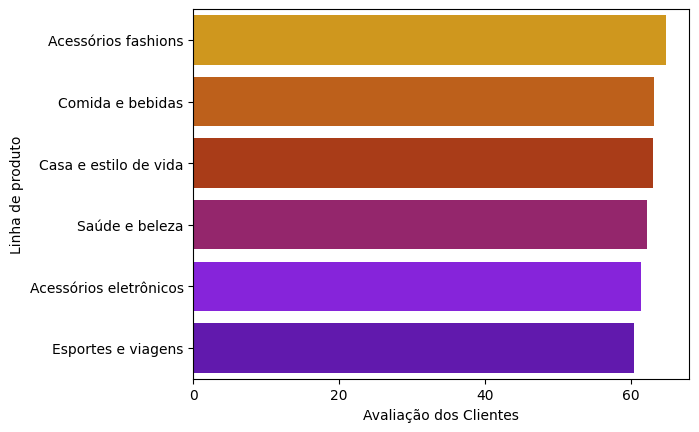

In [38]:
ax = sns.barplot(y = 'Linha de produto', x = 'Avaliação', data = Agrupando_avaliação, palette = Figura)
plt.rcParams['figure.figsize'] = (18, 10) #Aumentar o tamanho da Figura
ax.set_xlabel('Avaliação dos Clientes')
plt.rcParams.update({"font.size": 18}) #Aumentar a letra
plt.savefig('Linha_x_avaliacao.png', dpi=300)

#<font color='red'>Qual é a linha de produto mais bem avaliada? Levante hipótese sobre esse resultado?</font>

>acessórios fashions, é possível que a avaliação de acessórios fashion, esteja alta por não ser possível se enganar, não tem data de vencimento, o tecido pode ser sentido antes da compora, ou seja, se foi comprado, passou por uma série de critérios do comprador antes, tornando improvável a insatisfação de algo escolhido pelo cliente.


# **2 Análise**

#<font color='red'>O faz a função abaixo?</font>

>insere na variável agrupando_Produto_Total um agrupamento da coluna total por linha de produto

In [39]:
agrupando_Produto_Total = df.groupby('Linha de produto')['Total'].mean().reset_index(drop=False) # Agrupando a coluna linha de produto e Total

In [40]:
agrupando_Produto_Total

,Linha de produto,Total
0,Acessórios eletrônicos,4278.573529
1,Acessórios fashions,4043.292135
2,Casa e estilo de vida,4455.973125
3,Comida e bebidas,3912.985345
4,Esportes e viagens,4351.833434
5,Saúde e beleza,4024.018421


In [41]:
agrupando_Produto_Total = agrupando_Produto_Total.round(1) # arredondamento para uma casa decimal

#<font color='red'>Mude o gráfico abaixo para barras</font>


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Acessórios eletrônicos'),
  Text(1, 0, 'Acessórios fashions'),
  Text(2, 0, 'Casa e estilo de vida'),
  Text(3, 0, 'Comida e bebidas'),
  Text(4, 0, 'Esportes e viagens'),
  Text(5, 0, 'Saúde e beleza')])

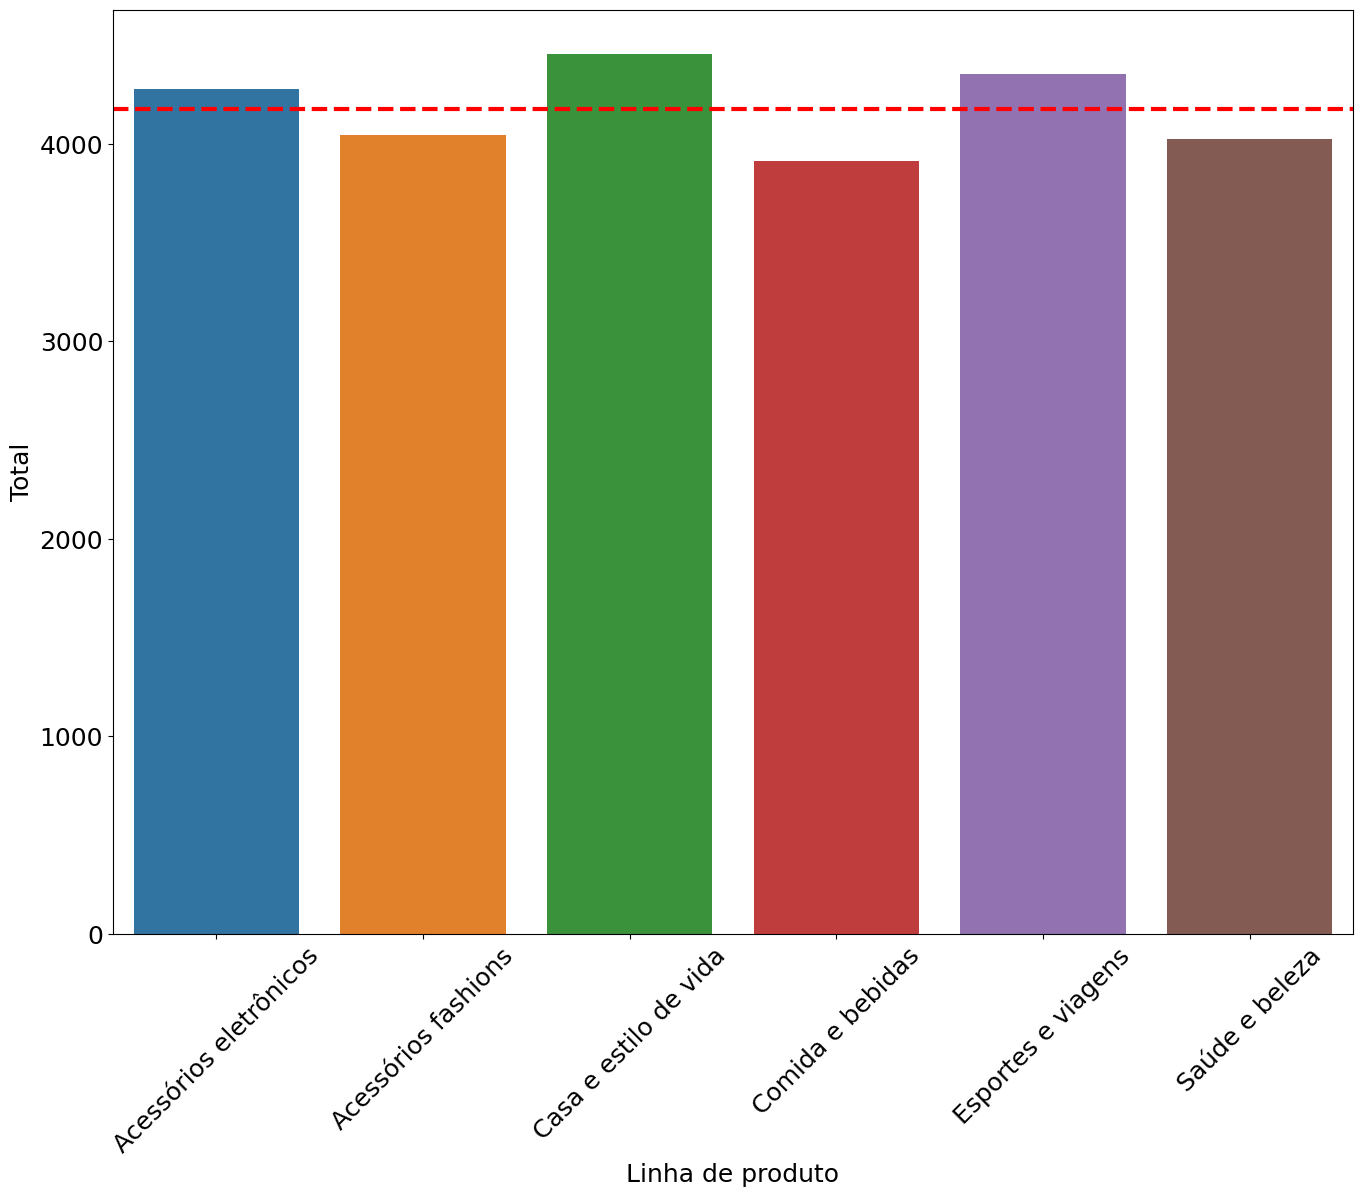

In [42]:
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.barplot(x = 'Linha de produto', y = 'Total', data = agrupando_Produto_Total) # tipo do gráfico scatter com tamanho dos pontos 75
plt.axhline(y=np.nanmean(df.Total), color='red', linestyle='--', linewidth=3, label='Média') #Média linha vermelha
plt.xticks(rotation = 45) # Colocar a legenda em 45 graus

#<font color='red'>Explique o gráfico acima</font>

> casa e estilo de vida é a linha de produto que tem os maiores custos para os clientes de todas as filiais, junto a ela, acessórios eletônicos e esportes e viagens oferecem valor total superior a média, as demais linhas geram compras com valores inferiores a média geral, sendo comida e bebidas a menor de todas.

# **3 Análise**

# Qual é a filial que tem a maior média de vendas (valor bruto)

In [43]:
df.head()

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Horário,Pagamento,COGS,Avaliação
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,Janeiro,Tarde,PIX,4705.4700,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,Março,Manhã,Dinheiro,1031.4000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,Março,Tarde,Cartão de Crédito,3405.2550,74
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,Janeiro,Noite,PIX,4191.8400,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,Fevereiro,Manhã,PIX,6796.9125,53


#<font color='red'>Explique a função abaixo</font>

>insere na variável agrupando_Filial_Total um agrupamento da coluna total por filial

In [44]:
agrupando_Filial_Total = df.groupby('Filial')['Total'].mean().reset_index(drop=False) 

In [45]:
agrupando_Filial_Total 

,Filial,Total
0,A,4110.275294
1,B,4179.079066
2,C,4237.762043


#<font color='red'>Mude para gráfico de barras</font>


(array([0, 1, 2]), [Text(0, 0, 'A'), Text(1, 0, 'B'), Text(2, 0, 'C')])

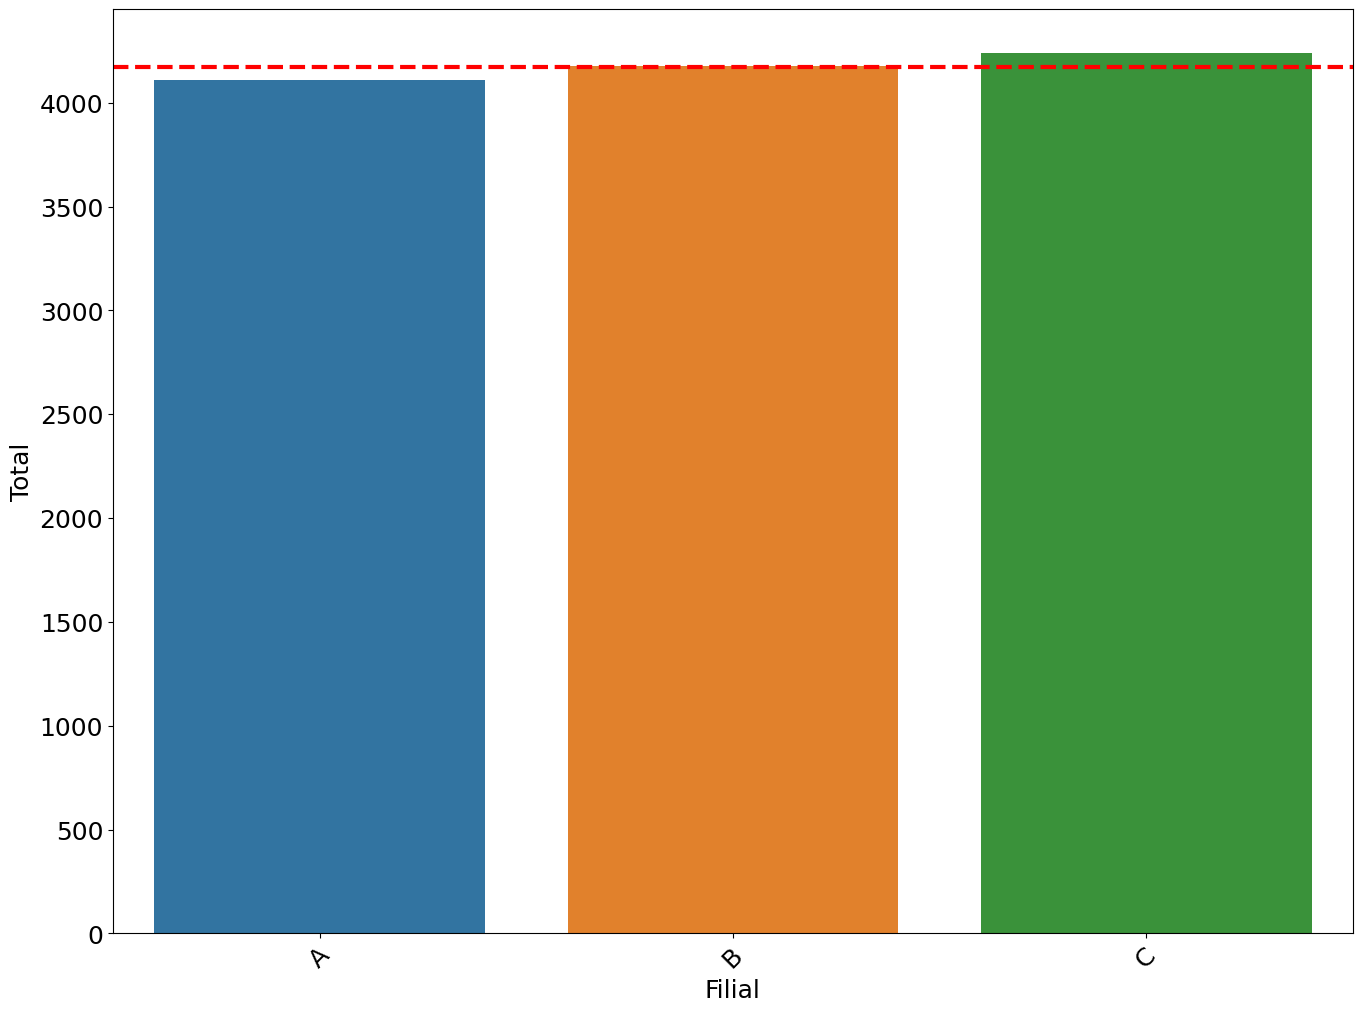

In [46]:
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.barplot(x = 'Filial', y = 'Total', data = agrupando_Filial_Total )
plt.axhline(y=np.nanmean(df.Total), color='red', linestyle='--', linewidth=3, label='Média')
plt.xticks(rotation = 45)

In [47]:
df.groupby('Filial')['Quantidade'].count()


Filial
A    340
B    332
C    328
Name: Quantidade, dtype: int64

#<font color='red'>Explique o gráfico acima</font>

> a margem de lucro da filial B é exatamente a média entre a filial A e C, mostrando um equilíbrio perfeito de valores por venda entre as três, sendo a filial A a com valor total menor atribuído, pode-se teorizar que sua localização é menos favorecida, tendo em vista que A teve 3,4% a mais de vendas que B e ainda teve uma média do valor total por compra menor, C por outro lado é um exato oposto, tendo vendido 1,2% a menos em quantidade, é a única filial a estourar a média.

# **4 Análise**

# <font color='red'>Explique o gráfico a seguir, o que significa?</font>

> o gráfico em caixa abaixo representa a densidade dos dados, ou seja, quando mais forte a cor da caixa, maior a quantidade de dados correspondentes a sua extenção existem, e quanto mais translúcida, menor a quantidade de dados representam aquele valor.


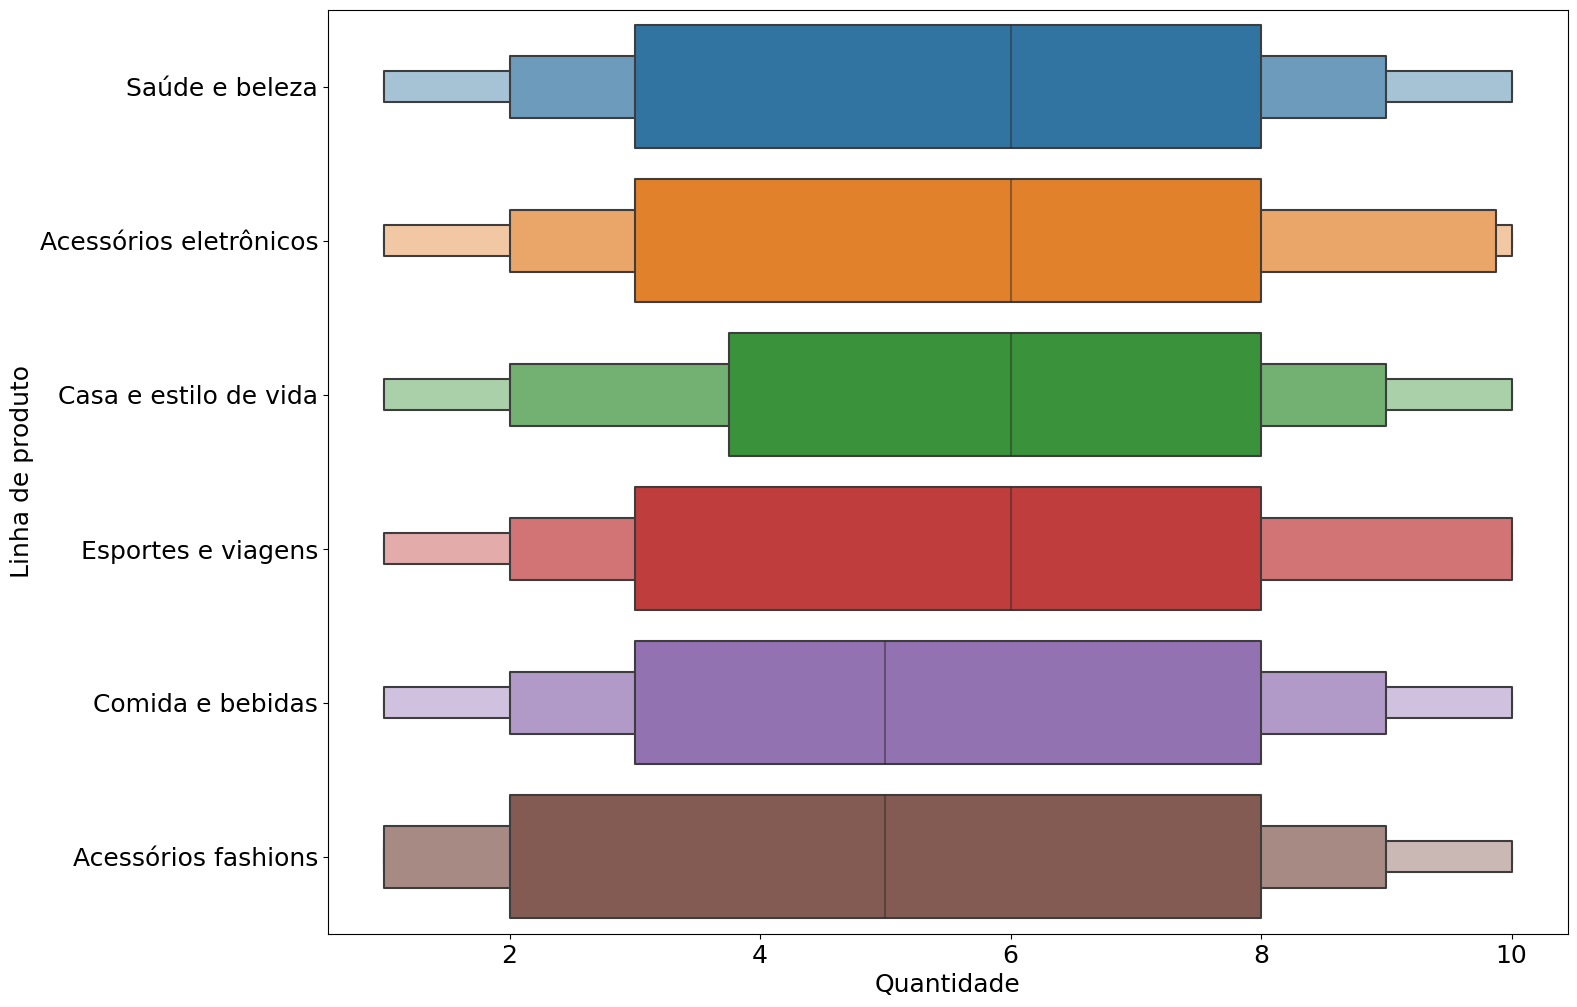

In [48]:
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.boxenplot(y='Linha de produto', x = 'Quantidade', data=df) #Cálculo da distribuição da quantidade em relação a linha de produto

In [49]:
df.head()

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Horário,Pagamento,COGS,Avaliação
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,Janeiro,Tarde,PIX,4705.4700,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,Março,Manhã,Dinheiro,1031.4000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,Março,Tarde,Cartão de Crédito,3405.2550,74
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,Janeiro,Noite,PIX,4191.8400,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,Fevereiro,Manhã,PIX,6796.9125,53


# **5 Análise**

# <font color='red'>Por que 'Quantidade' está acompanhado sum()?</font>

> sum() realiza a soma dos dados da coluna, ou seja, para cada um dos meses agrupados, ele soma a quantidade de itens vendidos naquele mês.

In [50]:
Agrupando_Data_Quantidade = df.groupby('Data')['Quantidade'].sum().reset_index(drop=False)

In [51]:
new_index = [1,0,2] #Alterando a ordem dos meses

In [52]:
Agrupando_Data_Quantidade = Agrupando_Data_Quantidade.reindex(new_index) # salvando

# <font color='red'>Explique o código acima:</font>

> foi feita uma lista reordenando de valores representando o index dos meses no agrupamento, feito uma reordenação da apresentação dos dados de acordo com a lista new_index, e foi salvo na mesma variável.

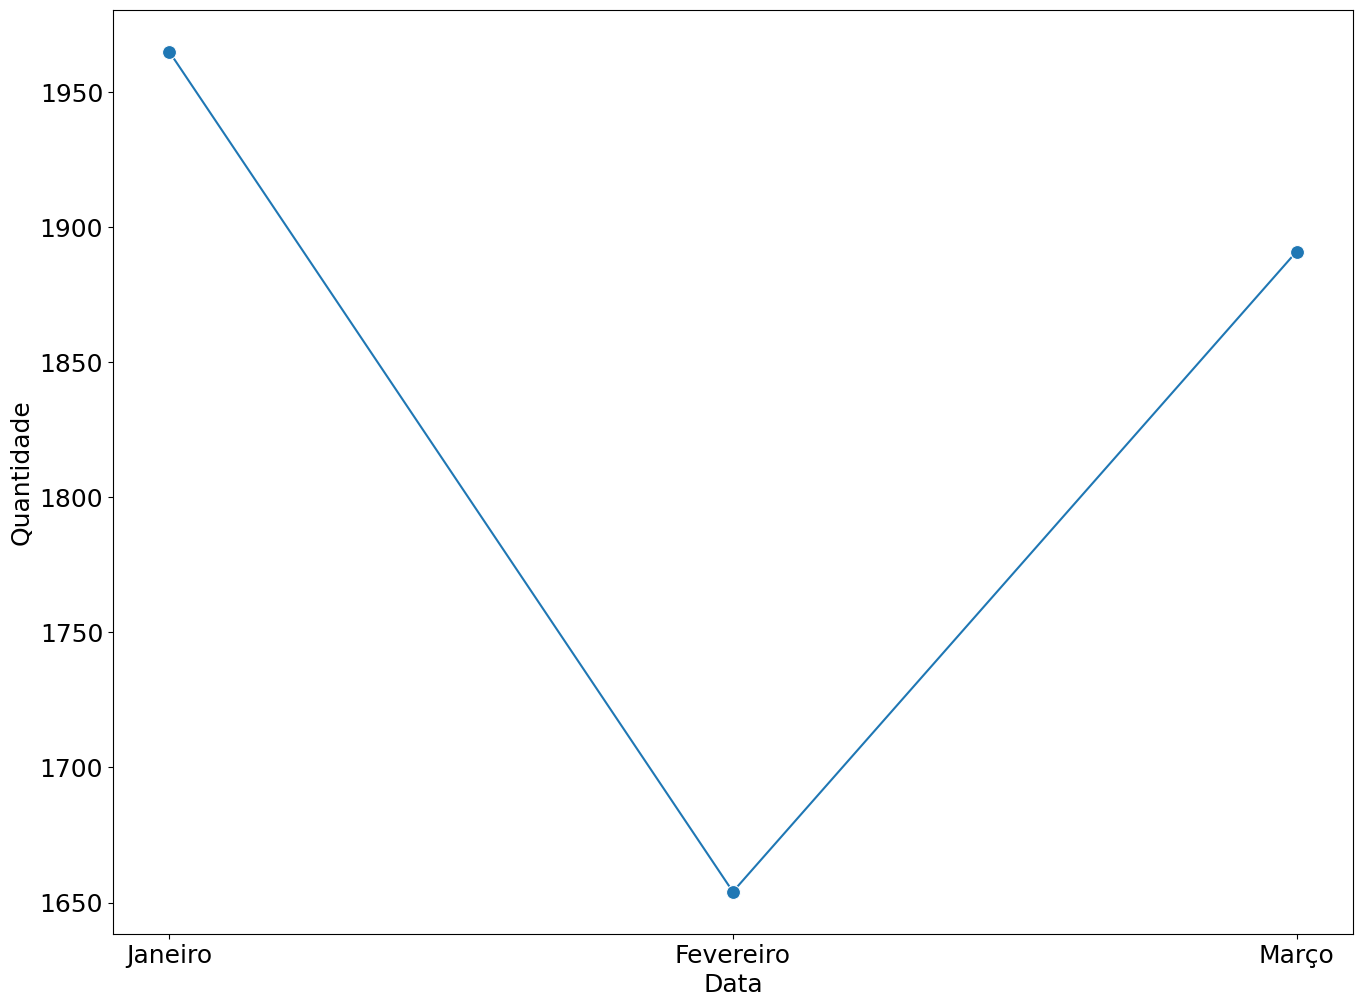

In [53]:
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.lineplot(x = 'Data', y ='Quantidade', data = Agrupando_Data_Quantidade, marker='o', markersize=10)

# <font color='red'>Explique o gráfico acima, o que significa?</font>

> que o alto de vendas em quantidade foi em janeiro, seguido de uma baixa em fevereiro, provavelmente uma consequência direta do pico de janeiro, então vindo março mais próximo da média porém ainda acima, possivelmente por causa da baixa de fevereiro, houve a necessidade de realizar mais compras em março.

In [54]:
Agrupando_Data_Quantidade

,Data,Quantidade
1,Janeiro,1965
0,Fevereiro,1654
2,Março,1891


In [55]:
df.head()

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Horário,Pagamento,COGS,Avaliação
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,Janeiro,Tarde,PIX,4705.4700,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,Março,Manhã,Dinheiro,1031.4000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,Março,Tarde,Cartão de Crédito,3405.2550,74
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,Janeiro,Noite,PIX,4191.8400,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,Fevereiro,Manhã,PIX,6796.9125,53


# **6 Análise**

# <font color='red'>Explique detalhamente o código abaixo:</font>

> foi setado o estilo de cores bmh para o pyplot, responsável por gerar o gráfico, então um agrupamento do valor total de cada venda por tipo de cliente, é exibido em forma de gráfico pizza, com o valor formatado para uma casa decimal após a vírgula, e uma espessura do circulo esterno limitada a 0.20 seu tamanho original


array([<Axes: ylabel='Total'>], dtype=object)

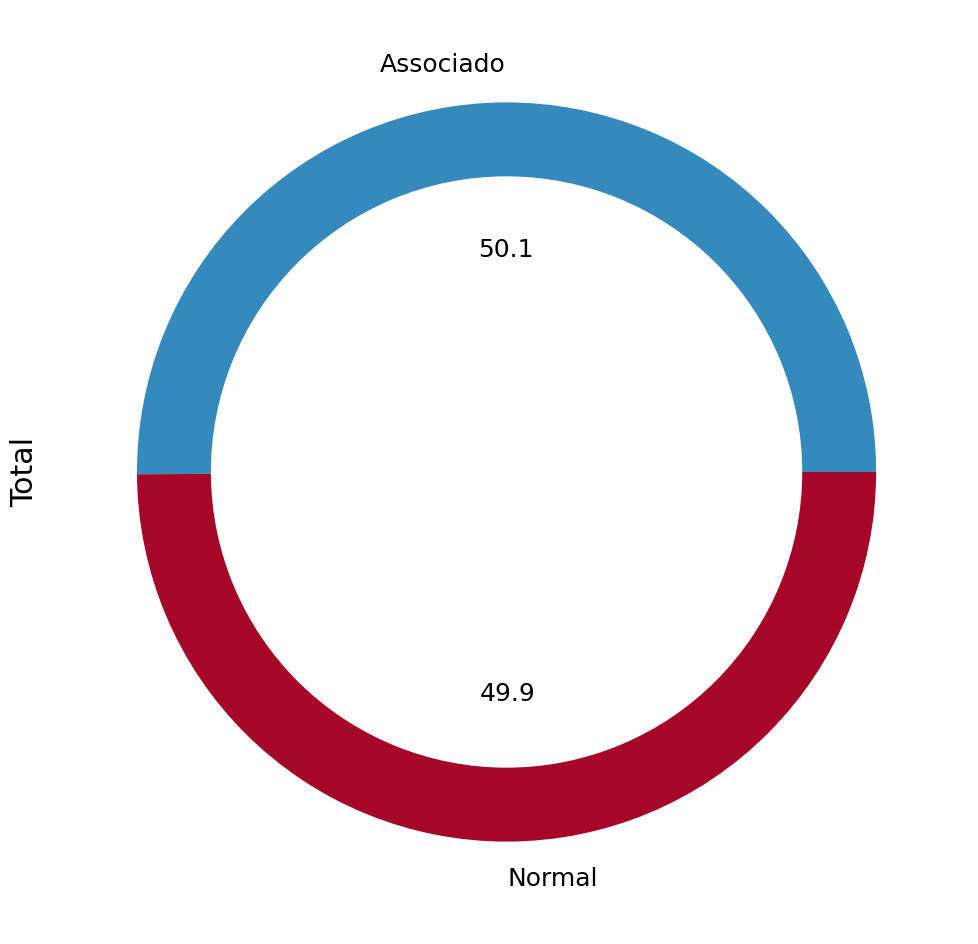

In [56]:
#plt.style.use('classic') #Gráfico Clássico
plt.style.use('bmh') #estilo cores
df.groupby('Tipo de Cliente').count()['Total'].plot(kind='pie', autopct='%.1f', figsize=(16,12), subplots=True, wedgeprops=dict(width=0.20))

In [57]:
df.groupby('Tipo de Cliente').count()['Total']

Tipo de Cliente
Associado    501
Normal       499
Name: Total, dtype: int64

# <font color='red'>Está coerente o gráfico acima?</font>

>está coerente com os dados da base, mas em teoria o mais óbvio seria supor que associados teriam uma média de gasto ainda maior que a de não associados demonstrada.

# **7 Análise**

# <font color='red'>Explique o código abaixo:</font>

>foi setado o estilo de cores bmh para o pyplot, responsável por gerar o gráfico, então um agrupamento do tipo de pagamento da venda em relação a quantidade de vendas, é exibido em forma de gráfico pizza, com o valor formatado para uma casa decimal após a vírgula, e uma espessura do circulo esterno limitada a 0.20 seu tamanho original




array([<Axes: ylabel='Total'>], dtype=object)

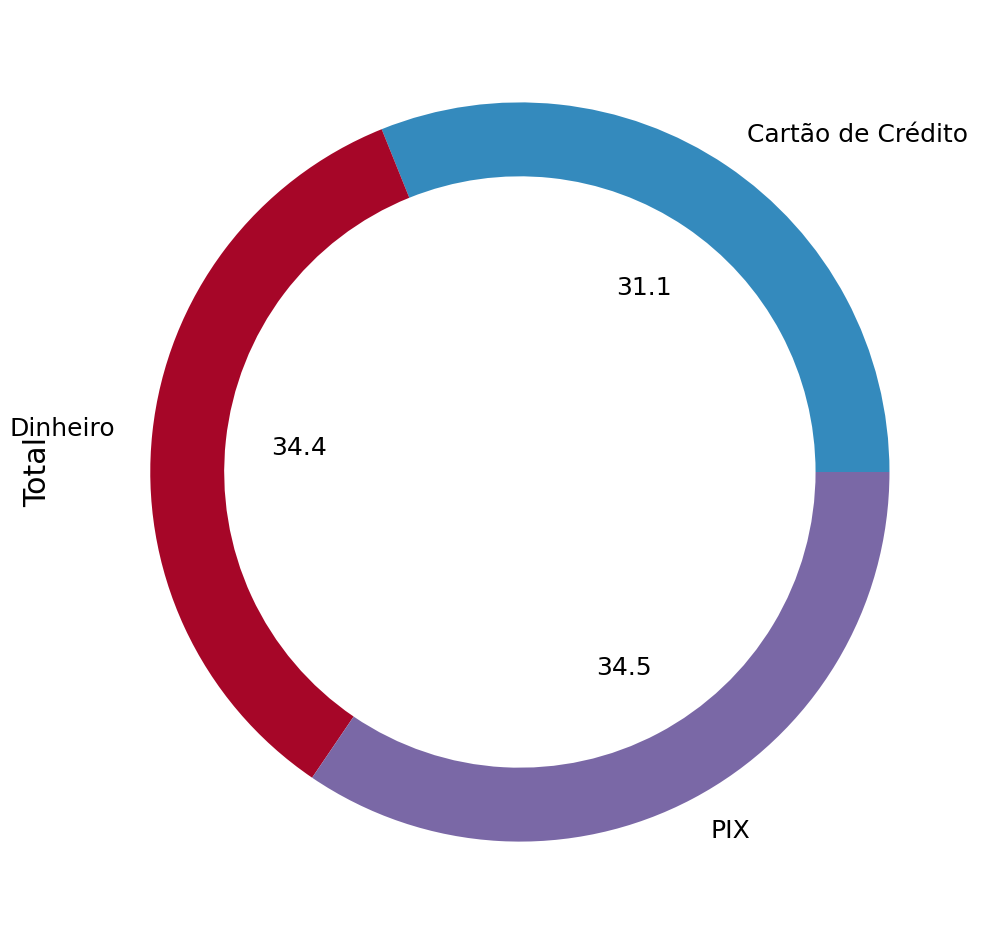

In [58]:
#plt.style.use('classic')
plt.style.use('bmh')
df.groupby('Pagamento').count()['Total'].plot(kind='pie', autopct='%.1f', figsize=(16,12), subplots=True, wedgeprops=dict(width=0.20))

# <font color='red'>O que significa o gráfico acima? Monte uma hipótese para esse resultado?</font>

> Ele representa quais tipos de pagamentos são mais utilizados, pode-se analizar que aproximadamente dois terços das vendas são feitas via pix ou dinheiro, sendo formas de de lucro imediato, e não eminente como crédito, ou seja, a maioria das vendas é instantâneamente transformada em dinheiro utilizável para o mercado.


# **8 Análise**

# <font color='red'>Explique o código a seguir?</font>

>insere na variável agrupamento_horario_total um agrupamento da coluna total por período do dia

In [59]:
agrupamento_horario_total = df.groupby('Horário')['Total'].mean().reset_index(drop=False)

In [60]:
agrupamento_horario_total

,Horário,Total
0,Manhã,4077.974464
1,Noite,4196.399202
2,Tarde,4218.379511


<Axes: xlabel='Horário', ylabel='Total'>

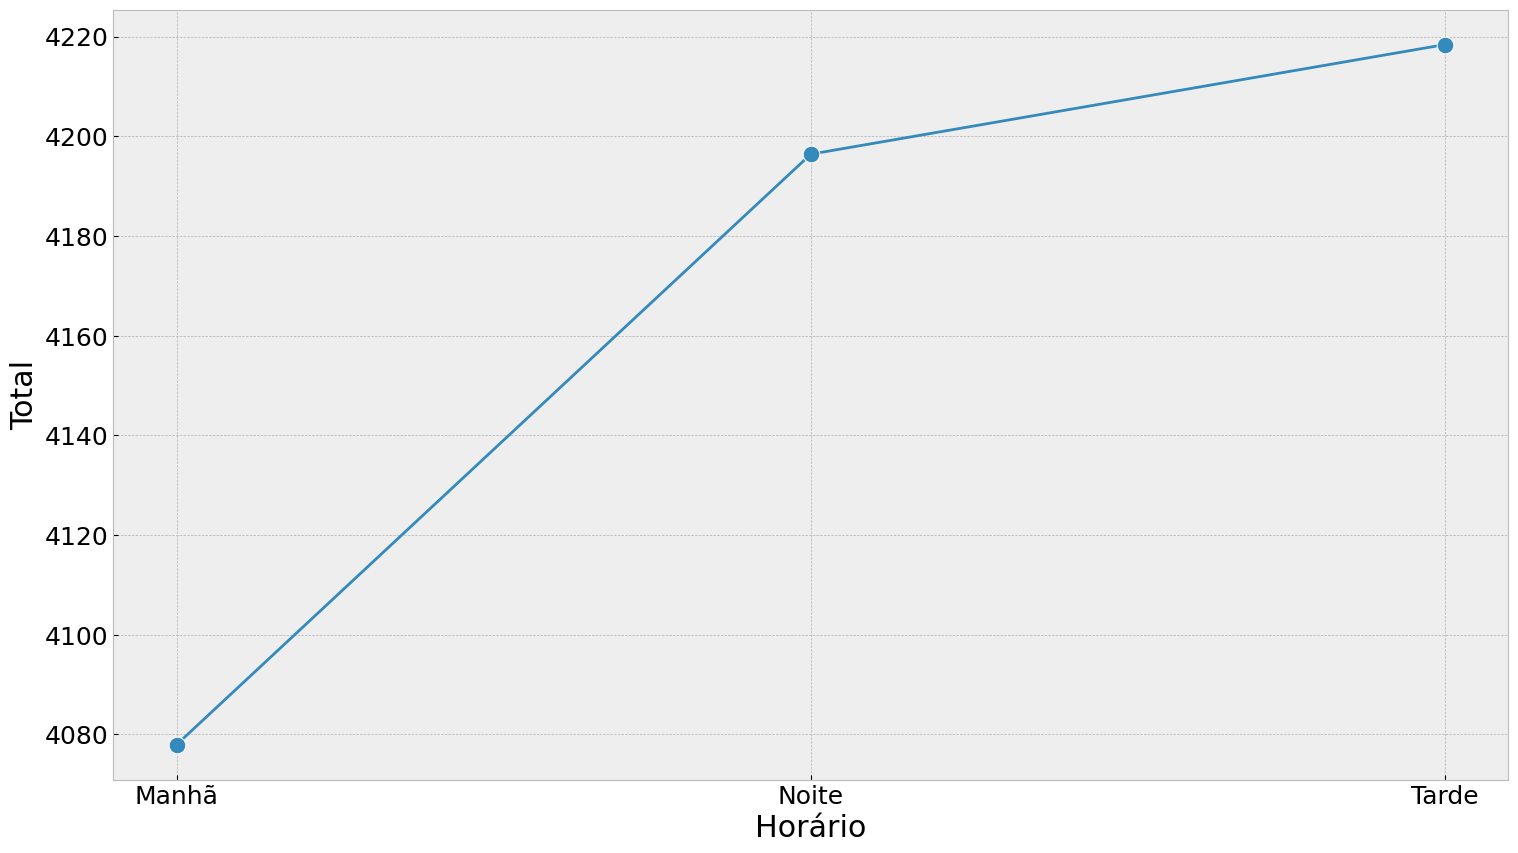

In [61]:
sns.lineplot(x = 'Horário', y = 'Total', data = agrupamento_horario_total, marker='o', markersize=12, linewidth=2)

# <font color='red'>Qual sua hipótese em relação ao gráfico acima:</font>

> o período da manhã é das 9 da manhã ao meio dia, somando três horas, a tarde considera o espaço de 5 horas entre uma e seis da tarde, por fim a noite considera tudo apartir das 6 da tarde até 9 da manhã do dia seguinte, considerando que o mercado fecha as 8, são somente duas horas. tendo o espaço te tempo por período, somado ao fato de ambos horários de pico, uma e seis da tarde estarem considerados como tarde, faz-se óbvio porque a tarde filtra a maior quantidade de vendas, e manhã é comunmente menos propício a movimentar vendas.

# 9 Análise

In [62]:
df['Lucro'] = df['Total'] - df['COGS']

In [63]:
df

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Horário,Pagamento,COGS,Avaliação,Lucro
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,Janeiro,Tarde,PIX,4705.4700,91,3136.9800
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,Março,Manhã,Dinheiro,1031.4000,96,114.6000
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,Março,Tarde,Cartão de Crédito,3405.2550,74,1459.3950
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,Janeiro,Noite,PIX,4191.8400,84,2794.5600
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,Fevereiro,Manhã,PIX,6796.9125,53,2265.6375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Normal,M,Saúde e beleza,605.25,1,605.25,Janeiro,Tarde,PIX,363.1500,62,242.1000
996,B,Normal,F,Casa e estilo de vida,1460.70,10,14607.00,Março,Tarde,PIX,10224.9000,44,4382.1000
997,A,Associado,M,Comida e bebidas,477.60,1,477.60,Fevereiro,Tarde,Dinheiro,405.9600,77,71.6400
998,A,Normal,M,Casa e estilo de vida,987.30,1,987.30,Fevereiro,Tarde,Dinheiro,691.1100,41,296.1900


# <font color='red'>Reorganize a coluna Lucro antes de Avaliação?</font>


In [64]:
colunas=['Filial', 'Tipo de Cliente',	'Gênero',	'Linha de produto',	'Preço unitário',	'Quantidade', 'Total', 'Data',	'Horário', 'Pagamento', 'COGS', 'Lucro' ,	'Avaliação']

In [65]:
df = df.reindex(columns=colunas)

In [66]:
df.head()

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Horário,Pagamento,COGS,Lucro,Avaliação
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,Janeiro,Tarde,PIX,4705.4700,3136.9800,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,Março,Manhã,Dinheiro,1031.4000,114.6000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,Março,Tarde,Cartão de Crédito,3405.2550,1459.3950,74
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,Janeiro,Noite,PIX,4191.8400,2794.5600,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,Fevereiro,Manhã,PIX,6796.9125,2265.6375,53


# <font color='red'>Qual linha de produto da mais lucro?</font>

> A linha de produto que oferece mais lucro é a Saúde e Beleza, seguido por casa e estilo de vida e Esportes e Viagens.

In [67]:
agrupando_Linha_Lucro = df.groupby('Linha de produto')['Lucro'].mean().reset_index(drop=False) 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Acessórios eletrônicos'),
  Text(1, 0, 'Acessórios fashions'),
  Text(2, 0, 'Casa e estilo de vida'),
  Text(3, 0, 'Comida e bebidas'),
  Text(4, 0, 'Esportes e viagens'),
  Text(5, 0, 'Saúde e beleza')])

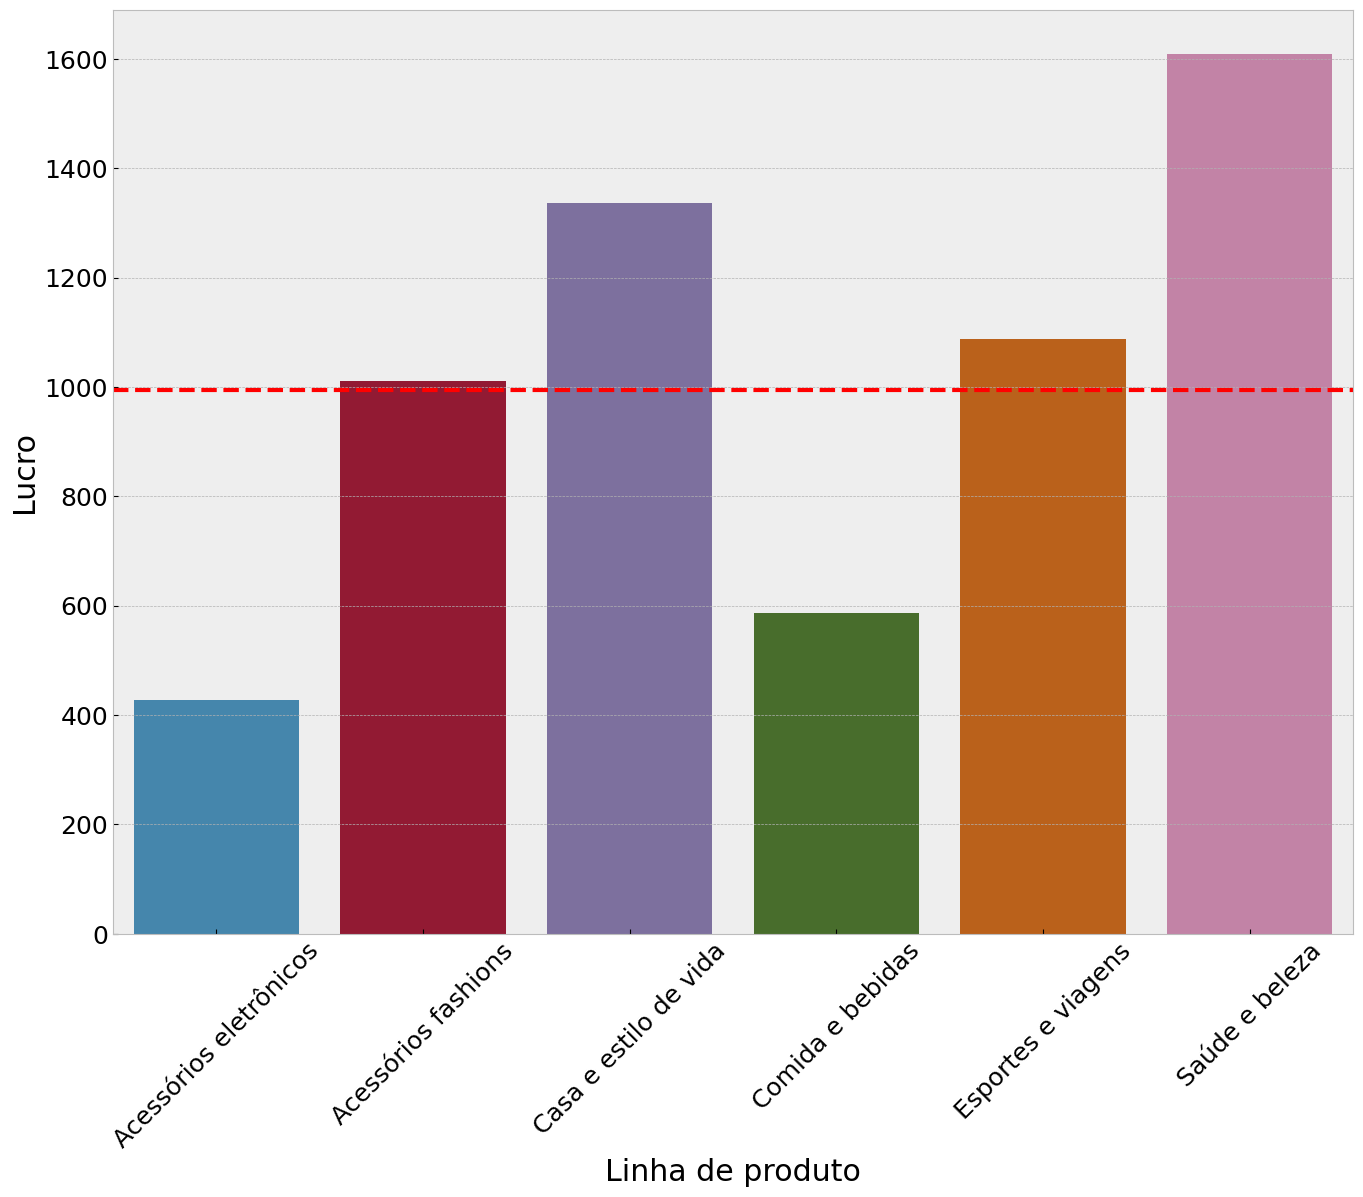

In [74]:
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.barplot(x = 'Linha de produto', y = 'Lucro', data = agrupando_Linha_Lucro )
plt.axhline(y=np.nanmean(df.Lucro), color='red', linestyle='--', linewidth=3, label='Média')
plt.xticks(rotation = 45)